In [17]:
# initialization
import matplotlib.pyplot as plt
import numpy as np

# importing Qiskit
from qiskit import IBMQ, Aer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, transpile, assemble

# import basic plot tools
from qiskit.visualization import plot_histogram

In [18]:
n = 2 # number of qubits used to represent s
s = '11'   # the hidden binary string

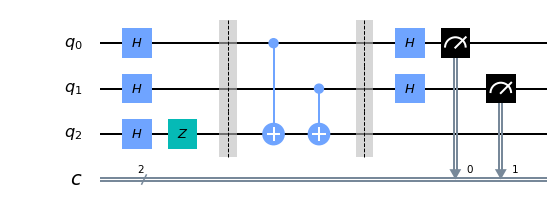

In [19]:
# We need a circuit with n qubits, plus one auxiliary qubit
# Also need n classical bits to write the output to
bv_circuit = QuantumCircuit(n+1, n)

# put auxiliary in state |->
bv_circuit.h(n)
bv_circuit.z(n)

# Apply Hadamard gates before querying the oracle
for i in range(n):
    bv_circuit.h(i)

# Apply barrier 
bv_circuit.barrier()

# Apply the inner-product oracle
s = s[::-1] # reverse s to fit qiskit's qubit ordering

for q in range(n):
    if s[q] == '0':
        bv_circuit.i(q)
    else:
        bv_circuit.cx(q, n)

# Apply barrier 
bv_circuit.barrier()

#Apply Hadamard gates after querying the oracle
for i in range(n):
    bv_circuit.h(i)

# Measurement
for i in range(n):
    bv_circuit.measure(i, i)

bv_circuit.draw(output='mpl')


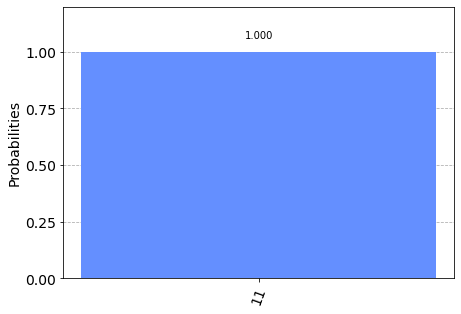

In [20]:
# use local simulator
qasm_sim = Aer.get_backend('qasm_simulator')
shots = 1024
qobj = assemble(bv_circuit)
results = qasm_sim.run(qobj).result()
answer = results.get_counts()

plot_histogram(answer)

In [21]:
from qiskit.tools.monitor import job_monitor
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q-lanl', group='lanl', project='quantum-optimiza')
provider.backends()
backend = provider.get_backend("ibmq_toronto")

output = []
for i in range (5):
    shots = 1024
    transpiled_bv_circuit = transpile(bv_circuit, backend)
    qobj = assemble(transpiled_bv_circuit, shots=shots)
    job = backend.run(qobj)
    job_monitor(job, interval=2)
    results = job.result()
    answer = results.get_counts()
    output.append(answer['11']/1024)
    plot_histogram(answer)

ibmqfactory.load_account:WARNING:2021-05-06 22:26:30,911: Credentials are already in use. The existing account in the session will be replaced.


Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run


In [22]:
print((output))

[0.66015625, 0.6162109375, 0.67578125, 0.76953125, 0.7685546875]
